In [ ]:
import numpy as np
import pandas as pd
import data_utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import set_config

set_config(transform_output="pandas")

# Load The data

In [ ]:
df = pd.read_csv("train.csv")



# Clean Data

In [ ]:
data_utils.performing_data_cleaning(df)

In [ ]:
df = pd.read_csv("cleaned_data.csv")

df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,Saturday,3,saturday,1,15.0,11.0,morning,2.550318,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,Friday,3,friday,0,5.0,19.0,evening,17.015498,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,Saturday,3,saturday,1,15.0,8.0,morning,1.309035,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,Tuesday,4,tuesday,0,10.0,18.0,evening,6.567610,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,Saturday,3,saturday,1,15.0,13.0,afternoon,5.235387,medium


In [ ]:
df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,Saturday,3,saturday,1,15.0,11.0,morning,2.550318,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,Friday,3,friday,0,5.0,19.0,evening,17.015498,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,Saturday,3,saturday,1,15.0,8.0,morning,1.309035,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,Tuesday,4,tuesday,0,10.0,18.0,evening,6.567610,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,Saturday,3,saturday,1,15.0,13.0,afternoon,5.235387,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,JAP,Thursday,3,thursday,0,10.0,11.0,morning,1.255998,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,AGR,Wednesday,2,wednesday,0,15.0,19.0,evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,CHEN,Friday,3,friday,0,15.0,23.0,night,3.926196,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,COIMB,Monday,3,monday,0,5.0,13.0,afternoon,5.254149,medium


In [ ]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_day', 'distance', 'distance_type'],
      dtype='object')

In [ ]:
columns_to_drop = [
    'rider_id',
    'restaurant_latitude',
    'restaurant_longitude',
    'delivery_latitude',
    'delivery_longitude',
    'order_date',
    'order_time_hour',
    "order_day"
]

df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,INDO,3,saturday,1,15.0,morning,2.550318,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,BANG,3,friday,0,5.0,evening,17.015498,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,BANG,3,saturday,1,15.0,morning,1.309035,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,COIMB,4,tuesday,0,10.0,evening,6.567610,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,CHEN,3,saturday,1,15.0,afternoon,5.235387,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,JAP,3,thursday,0,10.0,morning,1.255998,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,AGR,2,wednesday,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,CHEN,3,friday,0,15.0,night,3.926196,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,COIMB,3,monday,0,5.0,afternoon,5.254149,medium


In [ ]:
df.isna().sum()

,0
age,1854
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: >

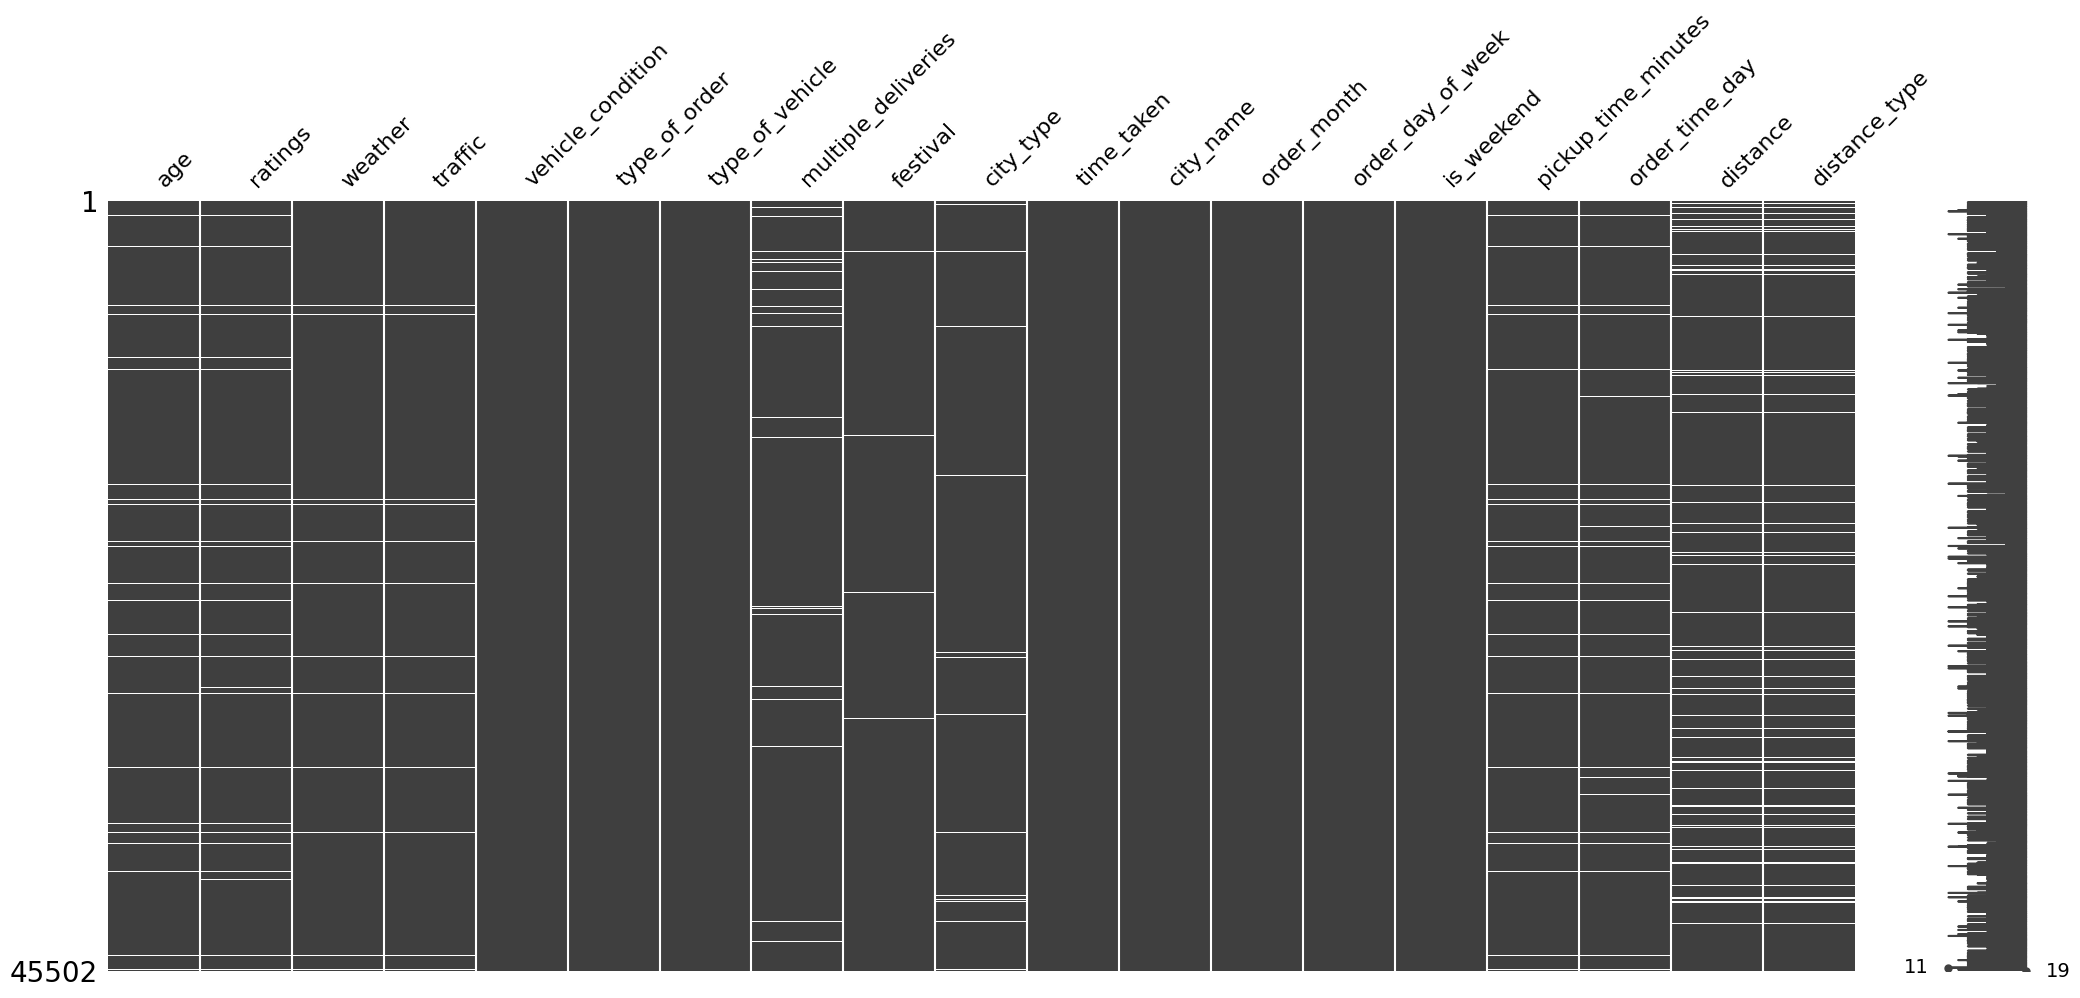

In [ ]:
import missingno as msno

msno.matrix(df)

In [ ]:
# columns that have missing values

missing_cols = (
    df
    .isna()
    .any(axis=0)
    .loc[lambda x: x]
    .index
)
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_day',
       'distance', 'distance_type'],
      dtype='object')

# Data Preparation

In [ ]:
temp_df = df.copy().dropna()

In [ ]:
x = temp_df.drop(columns="time_taken")
y = temp_df["time_taken"]

x

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,saturday,1,15.0,morning,2.550318,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,friday,0,5.0,evening,17.015498,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,saturday,1,15.0,morning,1.309035,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,tuesday,0,10.0,evening,6.567610,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,saturday,1,15.0,afternoon,5.235387,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,RANCHI,3,tuesday,0,10.0,night,13.994673,long
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,JAP,3,thursday,0,10.0,morning,1.255998,short
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,CHEN,3,friday,0,15.0,night,3.926196,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,COIMB,3,monday,0,5.0,afternoon,5.254149,medium


In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print("the size of the train data is ", x_train.shape)
print("the size of the test data is ", x_test.shape)

the size of the train data is  (30156, 18)
the size of the test data is  (7539, 18)


In [ ]:
y_train

,time_taken
8708,49
25198,31
34049,11
25987,24
37121,31
...,...
20239,30
7590,24
13610,15
1045,26


In [ ]:
x_train.isna().sum()

,0
age,0
ratings,0
weather,0
traffic,0
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
city_type,0


In [ ]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ["weather","type_of_order","type_of_vehicle","festival",
                    "city_type","city_name","order_month","order_day_of_week",
                  "is_weekend","order_time_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [ ]:
len(num_cols + nominal_cat_cols + ordinal_cat_cols)

16

In [ ]:
for col in ordinal_cat_cols:
  print(col, x_train[col].unique())

traffic ['jam' 'medium' 'high' 'low']
distance_type ['medium' 'short' 'long' 'very_long']


In [ ]:
traffic_order =  [ 'low', 'medium', 'high','jam']
distance_type_order =  ['short', 'medium', 'long', 'very_long']

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ("scale",MinMaxScaler(),num_cols),
    ("nominal",OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False),nominal_cat_cols),
    ("ordinal",OrdinalEncoder(categories=[traffic_order,distance_type_order]),ordinal_cat_cols)
], remainder="passthrough",n_jobs=-1, force_int_remainder_cols=False, verbose_feature_names_out=False)


preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'is_weekend', 'order_time_day']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [ ]:
x_train_tras = preprocessor.fit_transform(x_train)
x_test_tras = preprocessor.transform(x_test)

x_train_tras

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,order_day_of_week_tuesday,order_day_of_week_wednesday,is_weekend_1,order_time_day_evening,order_time_day_morning,order_time_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
8708,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2.0
25198,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1.0
34049,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0
25987,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,1.0
37121,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20239,0.578947,0.92,0.5,0.451895,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,0,0.0
7590,0.052632,1.00,1.0,0.612270,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1,1.0
13610,0.526316,0.92,0.0,0.322877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.0
1045,0.947368,0.96,0.5,0.004486,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0


In [ ]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [ ]:
y_train_pt

,x0
0,2.028672
1,0.554539
2,-2.024267
3,-0.173699
4,0.554539
...,...
30151,0.457580
30152,-0.173699
30153,-1.350937
30154,0.047111


# Train Initial Baseline Model




In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train_tras,y_train_pt)


LinearRegression()

In [ ]:
y_pred_train = lr.predict(x_train_tras)
y_pred_test = lr.predict(x_test_tras)

In [ ]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f}minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 4.74minutes
The test error is 4.72 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.59
The test r2 score is 0.59


# Impute Missing values

In [109]:
temp_df = df.copy()

In [110]:
x = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

In [111]:
x

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,saturday,1,15.0,morning,2.550318,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,friday,0,5.0,evening,17.015498,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,saturday,1,15.0,morning,1.309035,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,tuesday,0,10.0,evening,6.567610,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,saturday,1,15.0,afternoon,5.235387,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,JAP,3,thursday,0,10.0,morning,1.255998,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,AGR,2,wednesday,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,CHEN,3,friday,0,15.0,night,3.926196,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,COIMB,3,monday,0,5.0,afternoon,5.254149,medium


In [112]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [113]:
print("the size of the train data is : ", x_train.shape)
print("the size of the test data is : ", x_test.shape)

the size of the train data is :  (36401, 18)
the size of the test data is :  (9101, 18)


In [114]:
x_train.isna().sum()

,0
age,1470
ratings,1510
weather,421
traffic,407
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,795
festival,188
city_type,968


In [115]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [116]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_day',
       'distance', 'distance_type'],
      dtype='object')

In [117]:
(
    x_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2)*100
)

np.float64(17.0)

# Age

In [118]:
x_train['age'].describe()

,age
count,34931.000000
mean,29.569551
std,5.752869
min,20.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,39.000000


In [119]:
x_train['age'].isna().sum()

np.int64(1470)

In [120]:
age_median = x_train['age'].median()

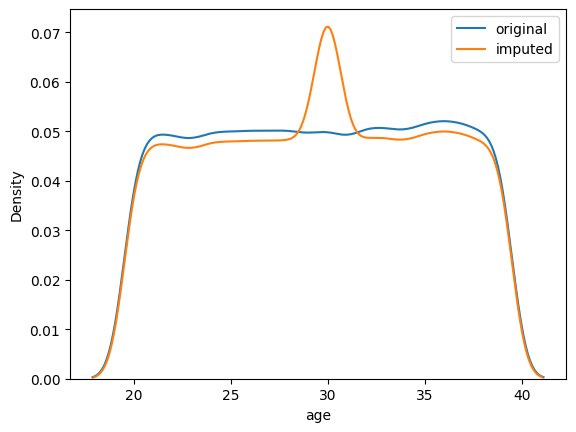

In [121]:
sns.kdeplot(x_train['age'],label="original")
sns.kdeplot(x_train['age'].fillna(age_median),label="imputed")
plt.legend()

### Observation



1.   Changed the distribution of the age column
2.   Use Advanced imputation technique like KNN imputer



# Ratings

In [122]:
x_train['ratings'].describe()

,ratings
count,34891.000000
mean,4.635058
std,0.314049
min,2.500000
25%,4.500000
50%,4.700000
75%,4.900000
max,5.000000


In [123]:
x_train['ratings'].isna().sum()

np.int64(1510)

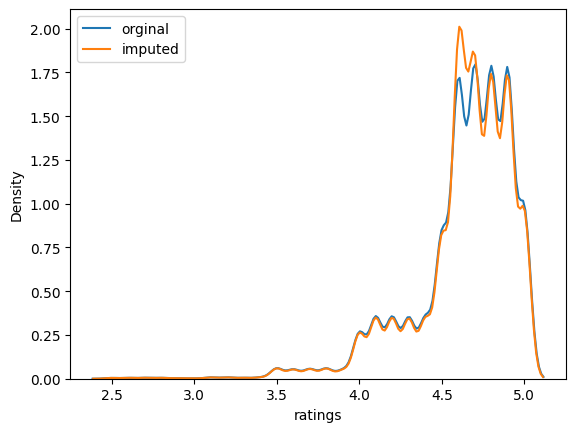

In [124]:
ratings_mean = x_train['ratings'].mean()


sns.kdeplot(x_train['ratings'],label="orginal")
sns.kdeplot(x_train['ratings'].fillna(ratings_mean),label="imputed")
plt.legend()

# Weather

In [125]:
x_train['weather'].value_counts()

,count
weather,
fog,6160
stormy,6051
cloudy,6033
sandstorms,5958
windy,5928
sunny,5850


In [126]:
x_train['weather'].isna().sum()

np.int64(421)

<Axes: xlabel='count', ylabel='weather'>

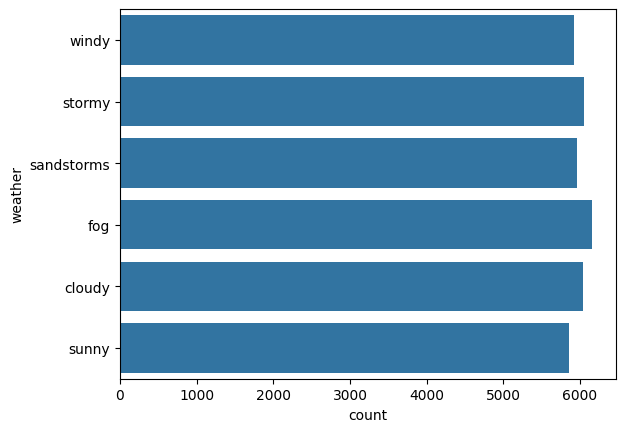

In [127]:
sns.countplot(x_train['weather'])

In [128]:
missing_weather = MissingIndicator()
missing_weather.set_output(transform="pandas")

weather_missing_flags = missing_weather.fit_transform(x_train[['weather']])

# Concatenate original + missing indicators
pd.concat([x_train[['weather']], weather_missing_flags], axis=1).sample(20)

,weather,missingindicator_weather
6167,fog,False
26243,cloudy,False
24009,stormy,False
5896,sunny,False
2684,fog,False
1548,windy,False
36943,cloudy,False
10952,fog,False
20098,fog,False
19644,stormy,False


# Traffic

In [129]:
x_train['traffic'].value_counts()

,count
traffic,
low,12323
jam,11320
medium,8773
high,3578


<Axes: xlabel='count', ylabel='traffic'>

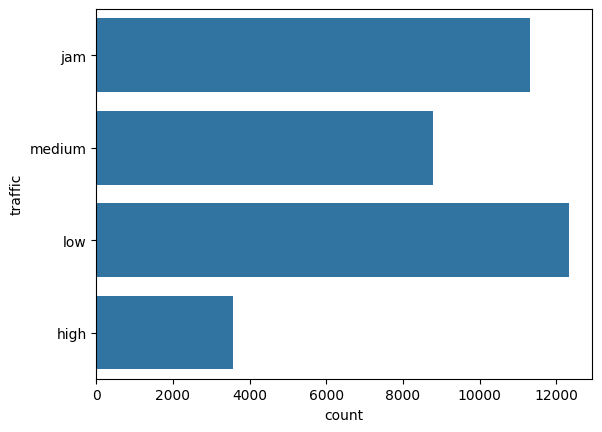

In [130]:
sns.countplot(x_train['traffic'])

In [131]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_day',
       'distance', 'distance_type'],
      dtype='object')

# Multiple Deliveries

In [132]:
x_train['multiple_deliveries'].value_counts()

,count
multiple_deliveries,
1.0,22487
0.0,11252
2.0,1599
3.0,268


<Axes: xlabel='multiple_deliveries', ylabel='count'>

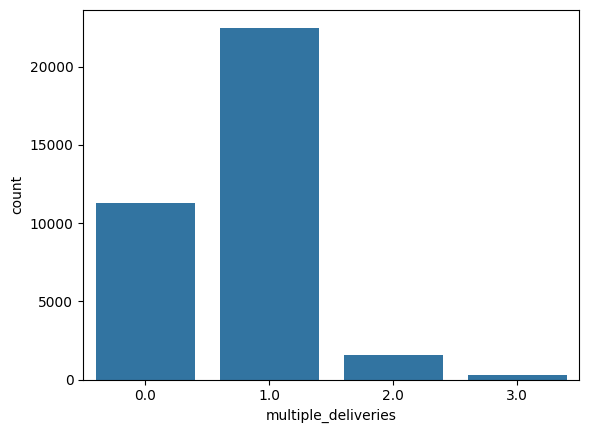

In [133]:
sns.countplot(x=x_train['multiple_deliveries'])

In [89]:
sns.countplot(x_train['multiple_deliveries']).apply(str)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7edd627b5300> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7edd62982840> (for post_execute):


KeyboardInterrupt: 

In [134]:
x_train['multiple_deliveries'].isna().sum()

np.int64(795)

In [135]:
multiple_deliveries_mode = x_train['multiple_deliveries'].mode()[0]

<Axes: xlabel='count', ylabel='multiple_deliveries'>

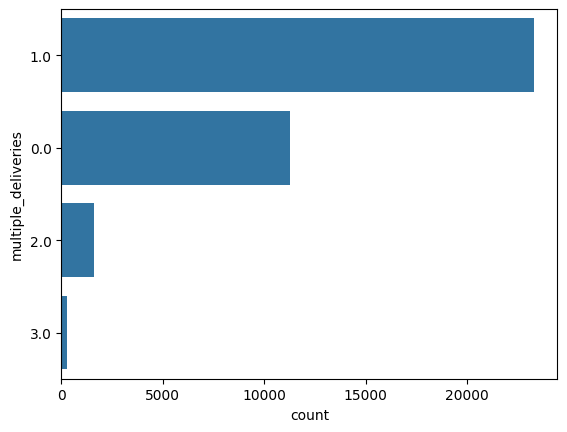

In [136]:
sns.countplot(x_train['multiple_deliveries'].fillna(multiple_deliveries_mode).apply(str))

# Festival

In [137]:
x_train['festival'].value_counts()

,count
festival,
no,35474
yes,739


<Axes: xlabel='count', ylabel='festival'>

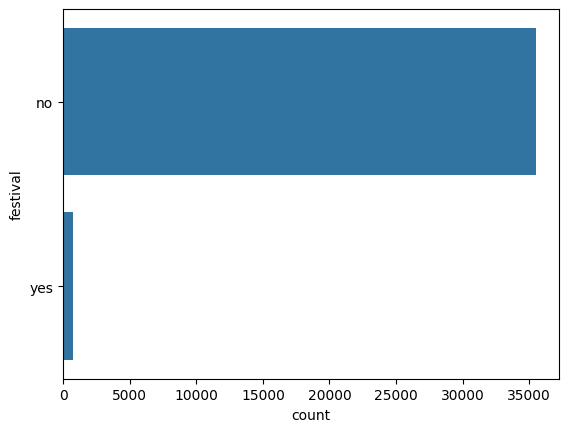

In [138]:
sns.countplot(x_train['festival'])

In [139]:
x_train['festival'].isna().sum()

np.int64(188)

In [140]:
festival_mode = x_train['festival'].mode()[0]

<Axes: xlabel='count', ylabel='festival'>

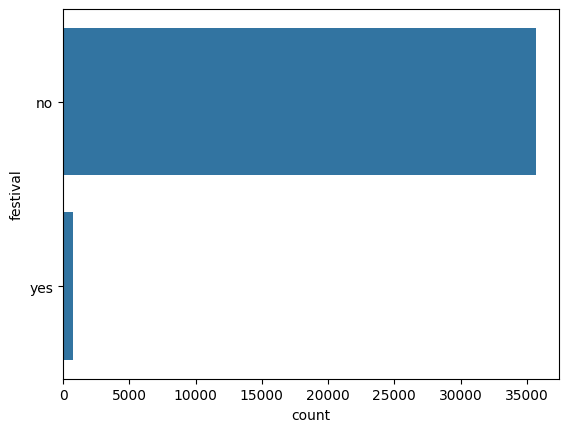

In [141]:
sns.countplot(x_train['festival'].fillna(festival_mode))

# City Type

In [142]:
x_train['city_type'].value_counts()

,count
city_type,
metropolitian,27245
urban,8058
semi-urban,130


In [143]:
x_train['city_type'].isna().sum()

np.int64(968)

In [144]:
city_type_mode = x_train['city_type'].mode()[0]

<Axes: xlabel='count', ylabel='city_type'>

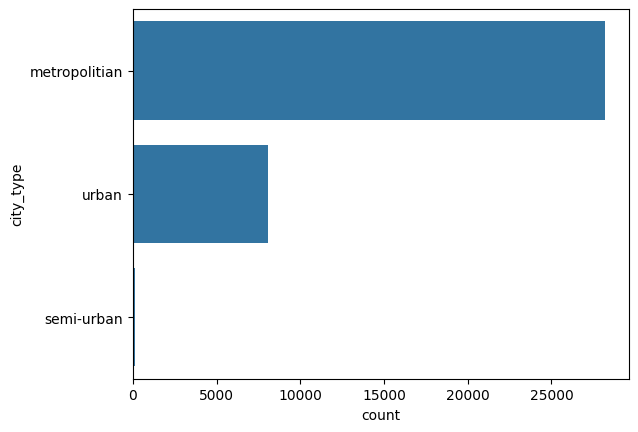

In [145]:
sns.countplot(x_train['city_type'].fillna(city_type_mode))

In [146]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_day',
       'distance', 'distance_type'],
      dtype='object')

# Pickup time minutes

In [154]:
x_train['pickup_time_minutes'].describe()

,pickup_time_minutes
count,35103.000000
mean,9.998718
std,4.082279
min,5.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,15.000000


In [155]:
x_train['pickup_time_minutes'].isna().sum()

np.int64(1298)

In [158]:
pickup_time_minutes_median = x_train['pickup_time_minutes'].median()

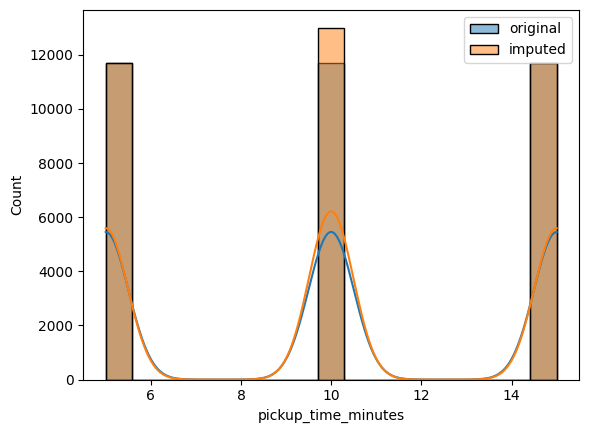

In [160]:
sns.histplot(x_train['pickup_time_minutes'],kde=True,label="original")
sns.histplot(x_train['pickup_time_minutes'].fillna(pickup_time_minutes_median),kde=True,label = "imputed")

plt.legend()

# Order time  day

In [161]:
x_train['order_time_day'].value_counts()

,count
order_time_day,
night,10994
evening,10906
morning,6883
afternoon,5972


In [162]:
x_train['order_time_day'].isna().sum()

np.int64(1646)

<Axes: xlabel='count', ylabel='order_time_day'>

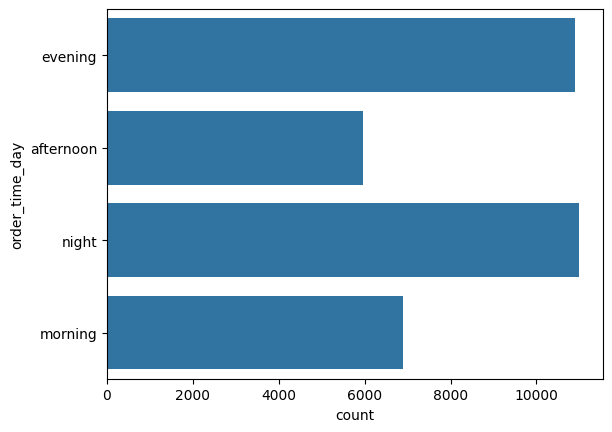

In [163]:
sns.countplot(x_train['order_time_day'])

In [165]:
x_train[x_train['order_time_day'].isna()]

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_day,distance,distance_type
14475,NaN,NaN,stormy,low,2,meal,scooter,1.0,no,metropolitian,MYS,3,saturday,1,NaN,NaN,1.310556,short
21916,20.0,2.8,sunny,low,2,drinks,scooter,1.0,no,metropolitian,JAP,3,wednesday,0,10.0,NaN,8.790564,medium
34951,28.0,5.0,fog,low,2,snack,motorcycle,1.0,no,metropolitian,HYD,3,sunday,1,15.0,NaN,14.250523,long
8165,NaN,NaN,NaN,NaN,3,meal,scooter,1.0,no,metropolitian,KOL,2,wednesday,0,NaN,NaN,16.585465,very_long
23469,NaN,NaN,sunny,jam,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,tuesday,0,NaN,NaN,3.940549,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33827,NaN,NaN,NaN,NaN,3,drinks,electric_scooter,1.0,no,urban,GOA,2,monday,0,NaN,NaN,NaN,NaN
22403,NaN,NaN,sunny,low,0,snack,motorcycle,1.0,no,urban,INDO,3,monday,0,NaN,NaN,2.550176,short
21518,NaN,NaN,stormy,jam,1,meal,scooter,0.0,no,urban,MYS,4,saturday,1,NaN,NaN,14.414254,long
22002,25.0,5.0,sunny,low,1,meal,scooter,1.0,no,metropolitian,LUDH,2,tuesday,0,5.0,NaN,7.409830,medium


# Distance

In [166]:
x_train['distance'].describe()

,distance
count,33470.000000
mean,8.209641
std,4.728099
min,1.235109
25%,3.926598
50%,7.750411
75%,11.533661
max,17.678093


In [167]:
x_train['distance'].describe()

,distance
count,33470.000000
mean,8.209641
std,4.728099
min,1.235109
25%,3.926598
50%,7.750411
75%,11.533661
max,17.678093


In [168]:
x_train['distance'].isna().sum()

np.int64(2931)

In [169]:
distance_mean = x_train['distance'].mean()

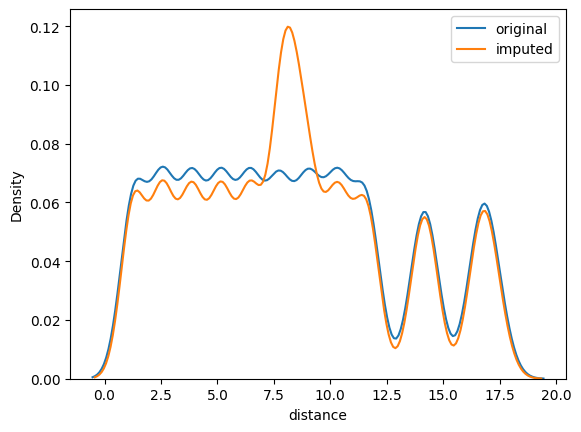

In [171]:
sns.kdeplot(x_train['distance'],label='original')
sns.kdeplot(x_train['distance'].fillna(distance_mean),label='imputed')
plt.legend()

# Distance Type

In [172]:
x_train['distance_type'].value_counts()

,count
distance_type,
medium,12000
short,9073
long,8945
very_long,3452


<Axes: xlabel='count', ylabel='distance_type'>

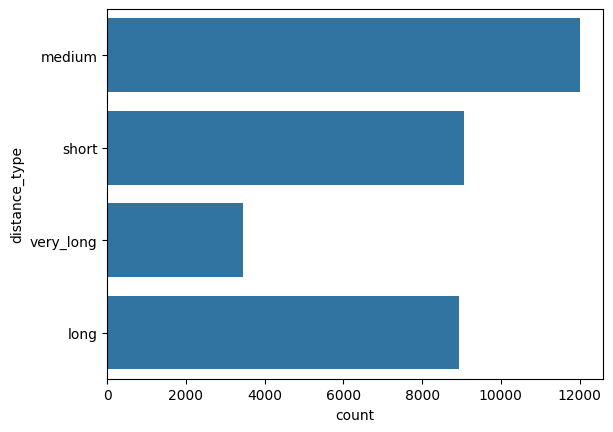

In [173]:
sns.countplot(x_train['distance_type'])

In [174]:
x_train['distance_type'].isna().sum()

np.int64(2931)

# Imputation Pipeline

In [175]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_day']

In [176]:
x_train.isna().sum()

,0
age,1470
ratings,1510
weather,421
traffic,407
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,795
festival,188
city_type,968


In [177]:
features_to_fill_mode = ['multiple_deliveries','festival','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

features_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_day']

In [178]:
simple_imputer = ColumnTransformer(
    transformers=[
        ("mode_imputer",SimpleImputer(strategy="most_frequent"),features_to_fill_mode),
        (("missing_imputer",SimpleImputer(strategy="constant"),features_to_fill_missing))
    ] ,remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False, verbose_feature_names_out=False)


In [179]:
simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'city_name', 'order_month',
                                  'order_day_of_week', 'is_weekend',
                                  'order_time_day'])],
                  verbose_feature_names_out=False)

In [180]:
simple_imputer.fit_transform(x_train)

,multiple_deliveries,festival,city_type,weather,type_of_order,type_of_vehicle,city_name,order_month,order_day_of_week,is_weekend,order_time_day,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance,distance_type
11029,1.0,no,metropolitian,windy,snack,electric_scooter,MUM,3,wednesday,0,evening,26.0,4.7,jam,2,10.0,7.737143,medium
15665,1.0,no,metropolitian,windy,drinks,motorcycle,SUR,3,thursday,0,afternoon,21.0,4.9,medium,2,5.0,5.126971,medium
14475,1.0,no,metropolitian,stormy,meal,scooter,MYS,3,saturday,1,missing_value,NaN,NaN,low,2,NaN,1.310556,short
29199,1.0,no,metropolitian,windy,buffet,motorcycle,JAP,4,monday,0,evening,32.0,4.7,medium,0,15.0,17.579273,very_long
22514,0.0,no,urban,sandstorms,meal,scooter,RANCHI,3,wednesday,0,night,34.0,4.9,jam,1,5.0,7.634640,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,no,metropolitian,sandstorms,meal,scooter,COIMB,4,monday,0,evening,29.0,4.7,jam,2,5.0,10.507945,long
44732,0.0,no,urban,cloudy,buffet,motorcycle,SUR,3,wednesday,0,morning,36.0,4.8,low,0,10.0,1.281783,short
38158,0.0,no,metropolitian,fog,buffet,scooter,BHP,2,thursday,0,evening,36.0,4.4,jam,1,10.0,NaN,NaN
860,1.0,no,metropolitian,windy,meal,scooter,CHEN,3,saturday,1,afternoon,25.0,4.9,medium,2,5.0,6.542771,medium


In [181]:
simple_imputer.fit_transform(x_train).isna().sum()

,0
multiple_deliveries,0
festival,0
city_type,0
weather,0
type_of_order,0
type_of_vehicle,0
city_name,0
order_month,0
order_day_of_week,0
is_weekend,0


In [183]:
knn_imputer = KNNImputer(n_neighbors=5)

In [184]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ["weather","type_of_order","type_of_vehicle","festival",
                    "city_type","city_name","order_month","order_day_of_week",
                  "is_weekend","order_time_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [185]:
traffic_order =  [ 'low', 'medium', 'high','jam']
distance_type_order =  ['short', 'medium', 'long', 'very_long']

In [189]:
preprocessor = ColumnTransformer(transformers=[
    ("scale",MinMaxScaler(),num_cols),
    ("nominal",OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False),nominal_cat_cols),
    ("ordinal",OrdinalEncoder(categories=[traffic_order,distance_type_order],
      encoded_missing_value= -999,
      handle_unknown="use_encoded_value",
      unknown_value=-1),
     ordinal_cat_cols)
], remainder="passthrough",n_jobs=-1, force_int_remainder_cols=False, verbose_feature_names_out=False)


preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'is_weekend', 'order_time_day']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [190]:
preprocessor.fit_transform(x_train)

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,weather_nan,...,order_day_of_week_wednesday,is_weekend_1,order_time_day_evening,order_time_day_morning,order_time_day_night,order_time_day_nan,traffic,distance_type,vehicle_condition,multiple_deliveries
11029,0.315789,0.88,0.5,0.395429,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2,1.0
15665,0.052632,0.96,0.0,0.236688,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,1.0
14475,NaN,NaN,NaN,0.004588,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.0
29199,0.631579,0.88,1.0,0.993990,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0,1.0
22514,0.736842,0.96,0.0,0.389195,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.473684,0.88,0.0,0.563939,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,2,0.0
44732,0.842105,0.92,0.5,0.002839,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0
38158,0.842105,0.76,0.5,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,-1.0,1,0.0
860,0.263158,0.96,0.0,0.322792,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2,1.0


In [191]:
preprocessor.fit_transform(x_train).isna().sum().loc[lambda ser: ser.ge(1)]

,0
age,1470
ratings,1510
pickup_time_minutes,1298
distance,2931
multiple_deliveries,795


In [192]:
processing_pipeline = Pipeline(steps=[
    ("imputer",simple_imputer),
    ("preprocessor",preprocessor),
    ("knn_imputer",knn_imputer)

])

In [193]:
processing_pipeline

Pipeline(steps=[('imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(strategy='constant'),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'city_name', 'order_mont...
                                                   'city_name', 'order_month',
                                                   'order_day_of_week',
                                                   'is_weekend',
                                                   'order_time_day']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [194]:
processing_pipeline.fit_transform(x_train)

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_missing_value,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,...,order_day_of_week_wednesday,is_weekend_1,order_time_day_evening,order_time_day_missing_value,order_time_day_morning,order_time_day_night,traffic,distance_type,multiple_deliveries,vehicle_condition
11029,0.315789,0.880,0.5,0.395429,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0
15665,0.052632,0.960,0.0,0.236688,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
14475,0.536842,0.896,0.5,0.004588,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
29199,0.631579,0.880,1.0,0.993990,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0
22514,0.736842,0.960,0.0,0.389195,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.473684,0.880,0.0,0.563939,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0
44732,0.842105,0.920,0.5,0.002839,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38158,0.842105,0.760,0.5,0.189351,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,-1.0,0.0,1.0
860,0.263158,0.960,0.0,0.322792,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0


In [195]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model_pipe = Pipeline(steps=[
    ("processing_pipeline",processing_pipeline),
    ("model",lr)
])

In [196]:
model_pipe

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(strategy='constant'),
                                                                   ['weather',
                                                                    'type_of_order',
                                                                    't...
                                                                    'order_day_of_week',
                                                                    'is_weekend',
                                                                    'order_time_day']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [202]:
model_pipe.fit(x_train,y_train_pt)

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(strategy='constant'),
                                                                   ['weather',
                                                                    'type_of_order',
                                                                    't...
                                                                    'order_day_of_week',
                                                                    'is_weekend',
                                                                    'order_time_day']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [203]:
y_pred_train = model_pipe.predict(x_train)
y_pred_test = model_pipe.predict(x_test)

In [204]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [205]:
print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f}minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 4.83minutes
The test error is 4.85 minutes


In [206]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.58
The test r2 score is 0.58


In [207]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42,n_jobs=-1)

model_pipe = Pipeline(steps=[
    ("processing_pipeline",processing_pipeline),
    ("model",rf)
])

In [208]:
model_pipe

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(strategy='constant'),
                                                                   ['weather',
                                                                    'type_of_order',
                                                                    't...
                                                                    'order_time_day']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [211]:
model_pipe.fit(x_train,y_train_pt.values.ravel())

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(strategy='constant'),
                                                                   ['weather',
                                                                    'type_of_order',
                                                                    't...
                                                                    'order_time_day']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [212]:
y_train_pred = model_pipe.predict(x_train)
y_test_pred = model_pipe.predict(x_test)

In [216]:
y_pred_train_org = pt.inverse_transform(y_train_pred.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_test_pred.reshape(-1,1))

In [217]:
print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f}minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.22minutes
The test error is 3.31 minutes


In [218]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.97
The test r2 score is 0.80
